In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import time
from sklearn.metrics import roc_auc_score
from IPython.display import display             # Allows the use of display for DataFrame
%matplotlib inline

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train["TARGET"].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [5]:
print(f"Shape: Train, {train.shape}; Test, {test.shape}")
display(train.describe())

Shape: Train, (76020, 371); Test, (75818, 370)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
train.info()
print(f"Number of columns with nan: {train.isna().any().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
Number of columns with nan: 0


In [7]:
condition_1=train["TARGET"]==1
condition_2=train["TARGET"]==0
print("The number of TARGET is one: ",train[condition_1].shape[0])
print("The number of TARGET is zero: ",train[condition_2].shape[0])

The number of TARGET is one:  3008
The number of TARGET is zero:  73012


In [8]:
# drop weak correlation data
x = []
for col in train.columns:
    if train[col].std() == 0:
        x.append(col)
        
# if std==0, the feature is unmeaning
# drop these columns
train.drop(x, axis = 1, inplace = True) # axis=1 drop by column, axis=0 drop by row
test.drop(x, axis = 1, inplace = True)

# drop same column
x = []
cols = train.columns
for i in range(len(cols) - 1):
    vals = train[cols[i]].values
    for j in range(i+1, len(cols)):
        if np.array_equal(vals, train[cols[j]].values):
            x.append(cols[j])
            
train.drop(x, axis = 1, inplace = True)
test.drop(x, axis = 1, inplace = True)

In [9]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


Text(0.5, 1.0, 'var15 = AGE')

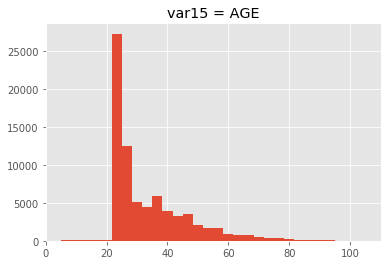

In [10]:
plt.style.use("ggplot")
train["var15"].hist(bins=30)
plt.title("var15 = AGE")

In [11]:
print(len(train["TARGET"][train.var15<23]))
print(sum(train["TARGET"][train.var15<23]))

1212
0


In [12]:
# spltting up combined train+test data, recording predictions
labels=train["TARGET"].values
df_train=train.drop(["TARGET"],axis=1)
df_test=test.copy()
id_test=test["ID"]
piv_train=train.shape[0]

In [13]:
# Creating a DataFrame with train+test data
df_all=pd.concat((df_train,df_test),axis=0,ignore_index=True)
# remove id
df_all=df_all.drop(["ID"],axis=1)
print(df_all.isnull().sum()/df_all.shape[0])
df_all.head()

var3                       0.0
var15                      0.0
imp_ent_var16_ult1         0.0
imp_op_var39_comer_ult1    0.0
imp_op_var39_comer_ult3    0.0
                          ... 
saldo_medio_var44_hace2    0.0
saldo_medio_var44_hace3    0.0
saldo_medio_var44_ult1     0.0
saldo_medio_var44_ult3     0.0
var38                      0.0
Length: 306, dtype: float64


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [14]:
# count number of zeros
df_all["n0"]=(df_all==0).sum(axis=1)
print(df_all.shape)

(151838, 307)


In [17]:
#Splitting train and test
vals = df_all.values
X = vals[:piv_train]
X_test_submit = vals[piv_train:]
y = labels

print (vals.shape)
print (X.shape)
print (X_test_submit.shape)

(151838, 307)
(76020, 307)
(75818, 307)


In [18]:
# normalize data
from sklearn.preprocessing import normalize
df_norm = normalize(df_all, axis=0)

In [19]:
#Splitting train and test
vals = df_norm
X = vals[:piv_train]
X_test_submit = vals[piv_train:]
y = labels

In [20]:
print (y.shape)
print (X.shape)
print (X_test_submit.shape)

(76020,)
(76020, 307)
(75818, 307)


In [21]:
from sklearn.model_selection import train_test_split

## split into train and validation
## use X,y for full training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.02, stratify=y, random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

(74499, 307)
(74499,)
(1521, 307)
(1521,)


In [22]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

ratio = float(np.sum(y == 1)) / np.sum(y==0)
est = XGBClassifier(max_depth=5, learning_rate=0.0202, n_estimators=556,
                    objective='binary:logistic', subsample=0.69, colsample_bytree=0.81, 
                    scale_pos_weight=ratio, seed=1776)                  

param = {
    'objective':'multi:softprob',                    
    'max_depth':6, 
    'learning_rate':0.25,
    'min_child_weight': 3,
    'n_estimators':43,                 
    'subsample':0.6, 
    'colsample_bytree':0.6,
    'num_class' :12
    }

In [23]:
# set the validation set for xgb training
eval_set = [(X_train,y_train), (X_valid,y_valid)]

# try using... eval_metric: mlogloss, merror, ndcg@n-, logloss, auc
est = XGBClassifier()
est.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=100, eval_metric='logloss')

[0]	validation_0-logloss:0.611652	validation_1-logloss:0.61196
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.544886	validation_1-logloss:0.545254
[2]	validation_0-logloss:0.489261	validation_1-logloss:0.4899
[3]	validation_0-logloss:0.442598	validation_1-logloss:0.443333
[4]	validation_0-logloss:0.40307	validation_1-logloss:0.403613
[5]	validation_0-logloss:0.36904	validation_1-logloss:0.369664
[6]	validation_0-logloss:0.339866	validation_1-logloss:0.340571
[7]	validation_0-logloss:0.314702	validation_1-logloss:0.315194
[8]	validation_0-logloss:0.292724	validation_1-logloss:0.293148
[9]	validation_0-logloss:0.273608	validation_1-logloss:0.274072
[10]	validation_0-logloss:0.257073	validation_1-logloss:0.257234
[11]	validation_0-logloss:0.24245	validation_1-logloss:0.242678
[12]	validation_0-logloss:0.229799	validation_1-logloss:0.229704
[13]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
# view the results, xgb
print(metrics.classification_report(y, est.predict(X)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     73012
           1       0.62      0.00      0.00      3008

    accuracy                           0.96     76020
   macro avg       0.79      0.50      0.49     76020
weighted avg       0.95      0.96      0.94     76020



In [25]:
## xgb, predict probabilities
ypred = est.predict_proba(X)
print (metrics.roc_auc_score(y, ypred[:,1]))

0.8532791256953098


In [27]:
## xgb, predict probabilities
ypred = est.predict_proba(X)
print (metrics.roc_auc_score(y, ypred[:,1]))

0.8532791256953098


In [28]:
## predict test, class probabilities
ypred_submit = est.predict_proba(X_test_submit)
print (X_test_submit.shape)
print (ypred_submit.shape)
print (ypred_submit[:7])

(75818, 307)
(75818, 2)
[[0.9417416  0.05825838]
 [0.941118   0.05888197]
 [0.9976848  0.00231522]
 [0.9872272  0.01277282]
 [0.99698454 0.00301545]
 [0.76107264 0.23892736]
 [0.9498652  0.05013476]]


In [29]:
# Generate submission: stack ids and targets together into dataframe
sub = pd.concat([id_test, pd.Series(ypred_submit[:,1], name='TARGET')], axis=1)

# write dataframe to csv
#sub.to_csv('submission.csv',index=False)
sub.to_csv('submission.csv',index=False, float_format='%.16f')

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=23)
model = clf.fit(X_train, y_train)

# Use predict_proba to predict probability of the class
y_pred = clf.predict_proba(X_valid)[:,1]

In [43]:
from sklearn import metrics
def buildROC(target_test,test_preds):
       fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
       roc_auc = metrics.auc(fpr, tpr)
       plt.title('Receiver Operating Characteristic')
       plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
       plt.legend(loc = 'lower right')
       plt.plot([0, 1], [0, 1],'r--')
       plt.ylabel('True Positive Rate')
       plt.xlabel('False Positive Rate')
       plt.gcf().savefig('roc.png')